r2_score is: -0.005619938012804582
mean sqrd error is:60.126311120843475
root mean sqr err is:7.754115753639707
r2_score is: -0.006912935014136368
mean sqrd error is:59.05683479723134
root mean sqr err is:7.684844487511204
r2_score is: -0.009337194335295118
mean sqrd error is:56.87290522188008
root mean sqr err is:7.5414126807833615
r2_score is: -0.012785157733105512
mean sqrd error is:68.2518222633799
root mean sqr err is:8.261466108589921
r2_score is: 0.2957368349102416
mean sqrd error is:71.51747895671004
root mean sqr err is:8.456800751862966


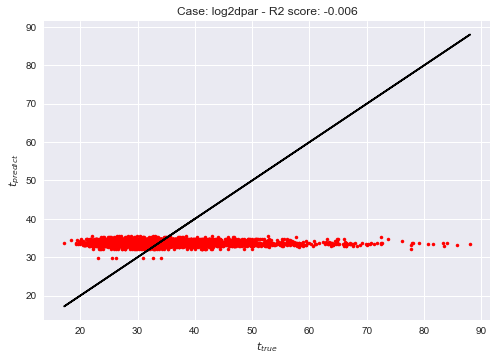

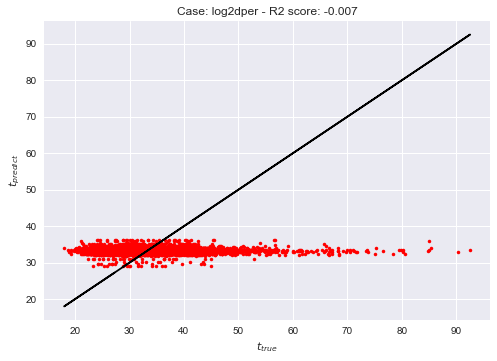

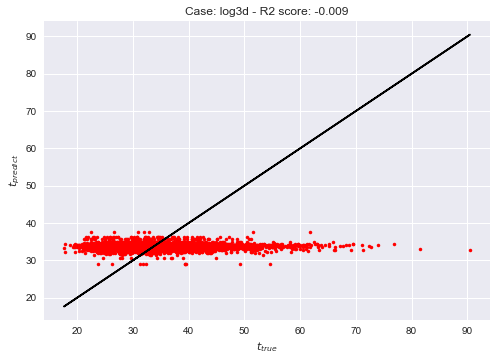

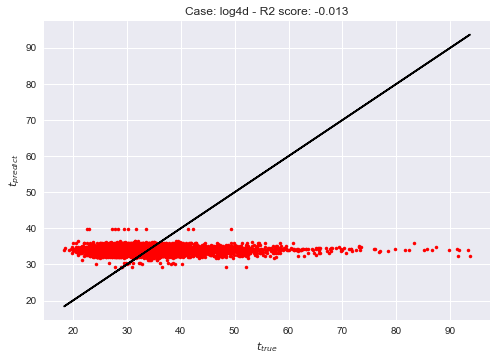

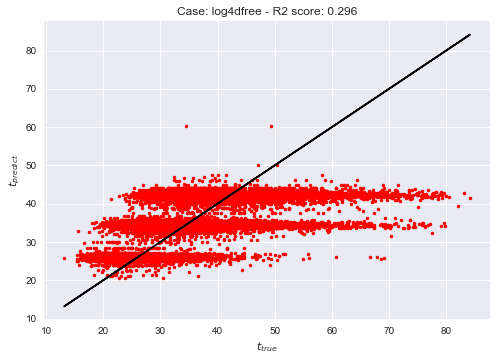

In [3]:
from sklearn.ensemble import RandomForestRegressor
#import r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpls
mpls.style.use('seaborn')

files = ['log2dpar','log2dper','log3d','log4d','log4dfree']

for f in files:
    dfl = pd.read_csv(f'../utilities/20220125/{f}.csv', 
                      names=["id","start","end","vmax","num-peds","num-cars","num-cross","in","out","time"])
    dfl.drop(dfl[dfl["num-peds"]<=49].index,inplace=True)
    dfl.drop_duplicates(inplace=True)
    #separate attributes from predicting attribute
    x = dfl.drop(['id','start','end','in','out','vmax','time'],axis=1) 
    #separate the predicting attribute into Y for model training
    y = dfl['time']
    #import train_test_split from sklearn
    from sklearn.model_selection import train_test_split
    #split the data
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4, random_state = 42)
    clf = RandomForestRegressor()
    #train the model
    clf.fit(x_train,y_train)
    #predict the model
    y_prediction = clf.predict(x_test)
    #predicting the accuracy score
    score=r2_score(y_test,y_prediction)
    meansqerr = mean_squared_error(y_test,y_prediction)
    print(f'r2_score is: {score}')
    print(f'mean sqrd error is:{meansqerr}')
    print(f'root mean sqr err is:{np.sqrt(meansqerr)}')
    fig, axs = plt.subplots(1)
    axs.plot(y_test, y_prediction,'r.')
    axs.plot(y_test,y_test,'k-')
    axs.set_xlabel('$t_{true}$')
    axs.set_ylabel('$t_{predict}$')
    axs.set_title(f'Case: {f} - R2 score: {score:.3f}')
    print('='*10)